<a href="https://colab.research.google.com/github/fishitmo/Machine-Learning-and-Data-Science-Projects/blob/main/Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Purpose of Document/Introduction**

The Purpose of this document is to analyse a dataset by the name of Students Performance in Exams and provide a best fit model output. The dataset being analysed was taken from https://www.kaggle.com/spscientist/students-performance-in-exams.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid", context = "notebook")

In [2]:
# Import dataset
import io
from google.colab import files
uploaded = files.upload() # C:\Users\werka\OneDrive\Documents\Machine_Learning_and_DataScience_Collection\Students Performance in Exams

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
df = pd.read_csv(filename)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#**Data Preprocessing**

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Find Duplicates

duplicate_rows = df[df.duplicated()]

print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [10]:
# removes duplicate rows from the DataFrame df
df.drop_duplicates(inplace= True)

# resets the index of the DataFrame df
df.reset_index(drop= True, inplace= True)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#**Data Balancing**

We have to check if our predicator varaible is balnced, otherwise that could induce a bias in our results.

<ipython-input-12-1ac109e68a04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df , x= "test preparation course", palette= colors)
<ipython-input-12-1ac109e68a04>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data= df , x= "test preparation course", palette= colors)


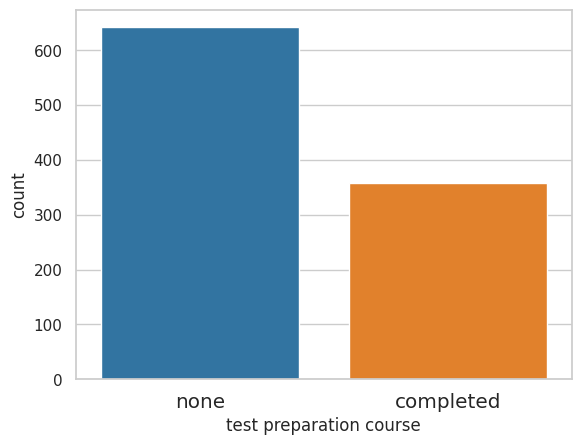

In [12]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
sns.countplot(data= df , x= "test preparation course", palette= colors)
plt.xticks(horizontalalignment= 'center', fontweight = 'light', fontsize= 'large')
plt.show()

In [13]:
columns = ["none", "completed"]
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

We will balance the data by taking the minimum  of both possibel values

In [14]:
n_sample = 358

col_types = df["test preparation course"]
random_samples = {}
for col in columns:
  random_index = np.random.choice(df[col_types == col].index, size= n_sample , replace= False)
  random_samples[col] = df.iloc[random_index]

In [15]:
df_balanced = pd.concat(random_samples.values(), ignore_index= True)

<ipython-input-16-626469999abf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_balanced, x= "test preparation course" , palette=colors)
<ipython-input-16-626469999abf>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data = df_balanced, x= "test preparation course" , palette=colors)


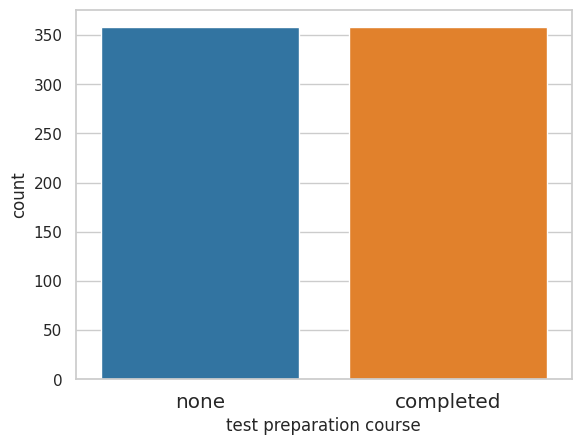

In [16]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
sns.countplot(data = df_balanced, x= "test preparation course" , palette=colors)
plt.xticks(horizontalalignment= 'center', fontweight= 'light', fontsize= 'large')
plt.show()

#**Machine Learning Model**

In [17]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 661.5 kB/s eta 0:00:00


In [18]:
#Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import category_encoders  as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#**Data Split**

In [19]:
X = df_balanced.drop(['test preparation course'], axis= 1)
y = df_balanced['test preparation course']

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [20]:
X_train.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Prepares the data for Machine Learning by encoding categorical variables using ordinal encoding and scaling numerical variables using standard scaling. It ensures that the data is in a suitable format for training a machine learning model.

In [21]:
num_variables = [col for col in X_train.columns if X_train[col].dtypes != object]

encoder = ce.OrdinalEncoder(cols = [col for col in X_train.columns if X_train[col].dtypes == object])

sc_x = StandardScaler()

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

numeric_scaler_train = sc_x.fit_transform(X_train[num_variables].values)
numeric_scaler_test = sc_x.fit_transform(X_test[num_variables].values)

for idx, feature in enumerate(num_variables):
   X_train[feature] = numeric_scaler_train[:, idx]
   X_test[feature] = numeric_scaler_test[:, idx]

In [22]:
X_train.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
56,1,1,1,1,0.905420,0.776832,0.936247
204,2,2,2,1,0.377892,0.845425,0.402781
319,2,3,2,1,-0.083694,-0.389255,-0.064002
529,1,4,1,1,0.773538,0.571052,0.536147
24,2,1,2,2,-0.743103,-0.389255,-0.464101


#**Decision Tree**

**Train the model**

In [23]:
tree = DecisionTreeClassifier(max_depth = 12, random_state= 42)
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

**Metrics**

In [24]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Train accuracy:', np.round(train_accuracy_tree,4))

print('Test accuracy:', np.round(test_accuracy_tree,4))


Train accuracy: 0.9948
Test accuracy: 0.5556


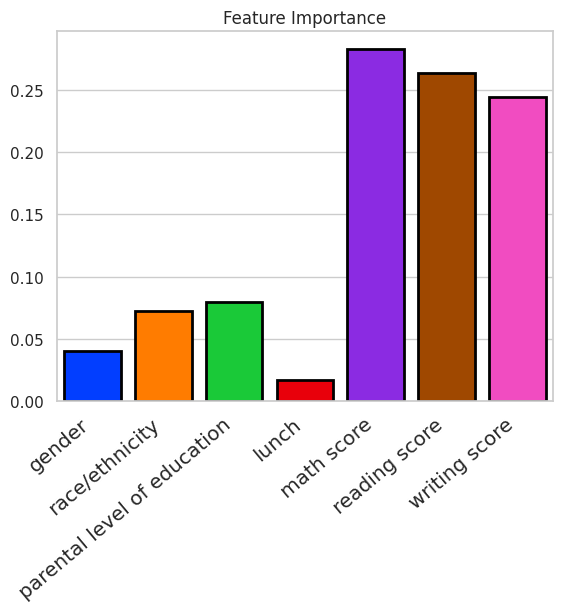

In [25]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
df_plot = pd.DataFrame(np.array([importances]), columns= columns)

sns.barplot(data= df_plot, palette= 'bright', saturation= 2.0, edgecolor= 'black', linewidth= 2)
plt.xticks(rotation= 40, horizontalalignment= 'right', fontweight= 'light', fontsize= 'large')
plt.title('Feature Importance')
plt.show()

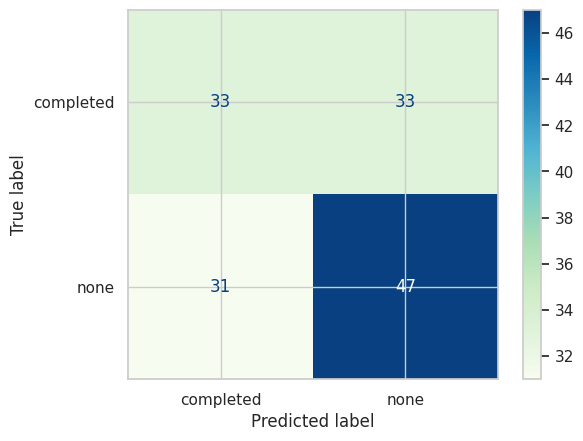

In [26]:
cm= confusion_matrix(y_test, y_test_pred_tree, labels= tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= tree.classes_)
disp.plot(cmap= 'GnBu')
plt.show()

#**Random Forest**

**Train the Model**

In [27]:
rf = RandomForestClassifier(n_estimators= 20 , random_state= 42)
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

**Metrics**

In [28]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f'Train accuracy: {np.round(train_accuracy_rf, 4)}')
print(f'Test accuracy: {np.round(test_accuracy_rf, 4)}')

Train accuracy: 0.9965
Test accuracy: 0.5694


In [29]:
feature_scores = pd.Series(rf.feature_importances_ , index = X_train.columns).sort_values(ascending= False)
feature_scores

writing score                  0.265076
reading score                  0.240717
math score                     0.229236
parental level of education    0.100323
race/ethnicity                 0.092044
gender                         0.037359
lunch                          0.035244
dtype: float64

<ipython-input-36-b8e5d64347a0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=feature_scores.index, palette=colors)


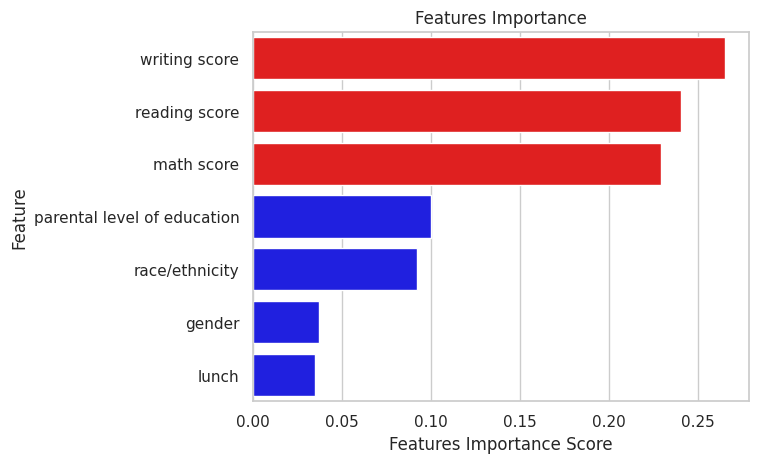

In [36]:
sns.barplot(x=feature_scores, y=feature_scores.index, palette=colors)
# sns.barplot(x= feature_scores, y = feature_scores.index)
plt.xlabel("Features Importance Score")
plt.ylabel("Feature")
plt.title("Features Importance")
plt.show()

https://www.kaggle.com/code/ronnycaprilesm/principles-decision-trees-and-random-forest

https://rpubs.com/vroylon/619662